In [136]:
import pandas as pd
import numpy
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score, precision_score
import matplotlib.pyplot as matplib
import seaborn as sns
from sklearn.linear_model import LogisticRegression

#Members: Muhammad H Abdillah, Athalla N R Anggorodi, Azhar Chukusheva, Precious Osazuwa, Jumanah Aljehairan, Muhammad Ashhad Shakil

In [97]:
#ANALYZING THE DATASET
#Read the dataset
df_lcancer = pd.read_csv('survey lung cancer.csv')

In [98]:
#Print the shape of the dataset
print(df_lcancer.shape)

(309, 16)


In [99]:
#Analyze the top and bottom rows of the dataset
df_lcancer.head(309)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [100]:
#CLEANING THE DATASET
#First we check for missing values
print(df_lcancer.isna().sum())

#As can be seen below, there are no missing values

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64


In [119]:
#Now we convert any datapoint in the form of a string into an integer, ensuring that the algorithm can process it since it only expects numerical values
#df_lcancer["GENDER"]=df_lcancer["GENDER"].map({"M":0, "F":1})
#df_lcancer["LUNG_CANCER"]=df_lcancer["LUNG_CANCER"].map({"NO":0, "YES":1})
#df_lcancer.head(309)

In [120]:
#No need to shuffle, but this is the code if we still want to
#df_lcancer=df_lcancer.sample(frac=1, random_state=42)
##df_lcancer.head(309)

In [121]:
#Split the data into train and test sets
x = df_lcancer.iloc[:,:15]
y = df_lcancer['LUNG_CANCER']

print("Independent variables:", x.shape)
print("Dependent variables:", y.shape)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

#Verify the shape for each split
print("X-train set:",x_train.shape)
print("X-test set:",x_test.shape)
print("Y-train set:",y_train.shape)
print("Y-test set:",y_test.shape)

Independent variables: (309, 15)
Dependent variables: (309,)
X-train set: (231, 15)
X-test set: (78, 15)
Y-train set: (231,)
Y-test set: (78,)


In [122]:
#Feature scaling for better performance, removes mean and standardizes units
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

#Initialize the Decision Tree Classifier
#(Not Regressor, because Regressor is used for when the dependent variable is numerical -- Classifier is for when the dependent is in categories
#In our case, the categories are: "THERE IS LUNG CANCER" and "THERE'S NO LUNG CANCER"
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)

DecisionTreeClassifier()

In [123]:
#Now we can predict the outcome
y_pred = DTC.predict(x_test)

#Print actual data and predicted values to compare
print('Actual data:')
print(list(y_test[:50]))
print('Predicted values:')
print(list(y_pred[:50]))

Actual data:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]
Predicted values:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1]


In [125]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
 
# Calculate the accuracy score
acc = accuracy_score(y_test, y_pred)
 
# Calculate the classification report
clf_report = classification_report(y_test, y_pred)
 
# Print the results
print("Confusion matrix:")
print(cm)
print("Accuracy score:", acc)
print("Classification report:\n", clf_report)

Confusion matrix:
[[ 4  1]
 [ 3 70]]
Accuracy score: 0.9487179487179487
Classification report:
               precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.99      0.96      0.97        73

    accuracy                           0.95        78
   macro avg       0.78      0.88      0.82        78
weighted avg       0.96      0.95      0.95        78



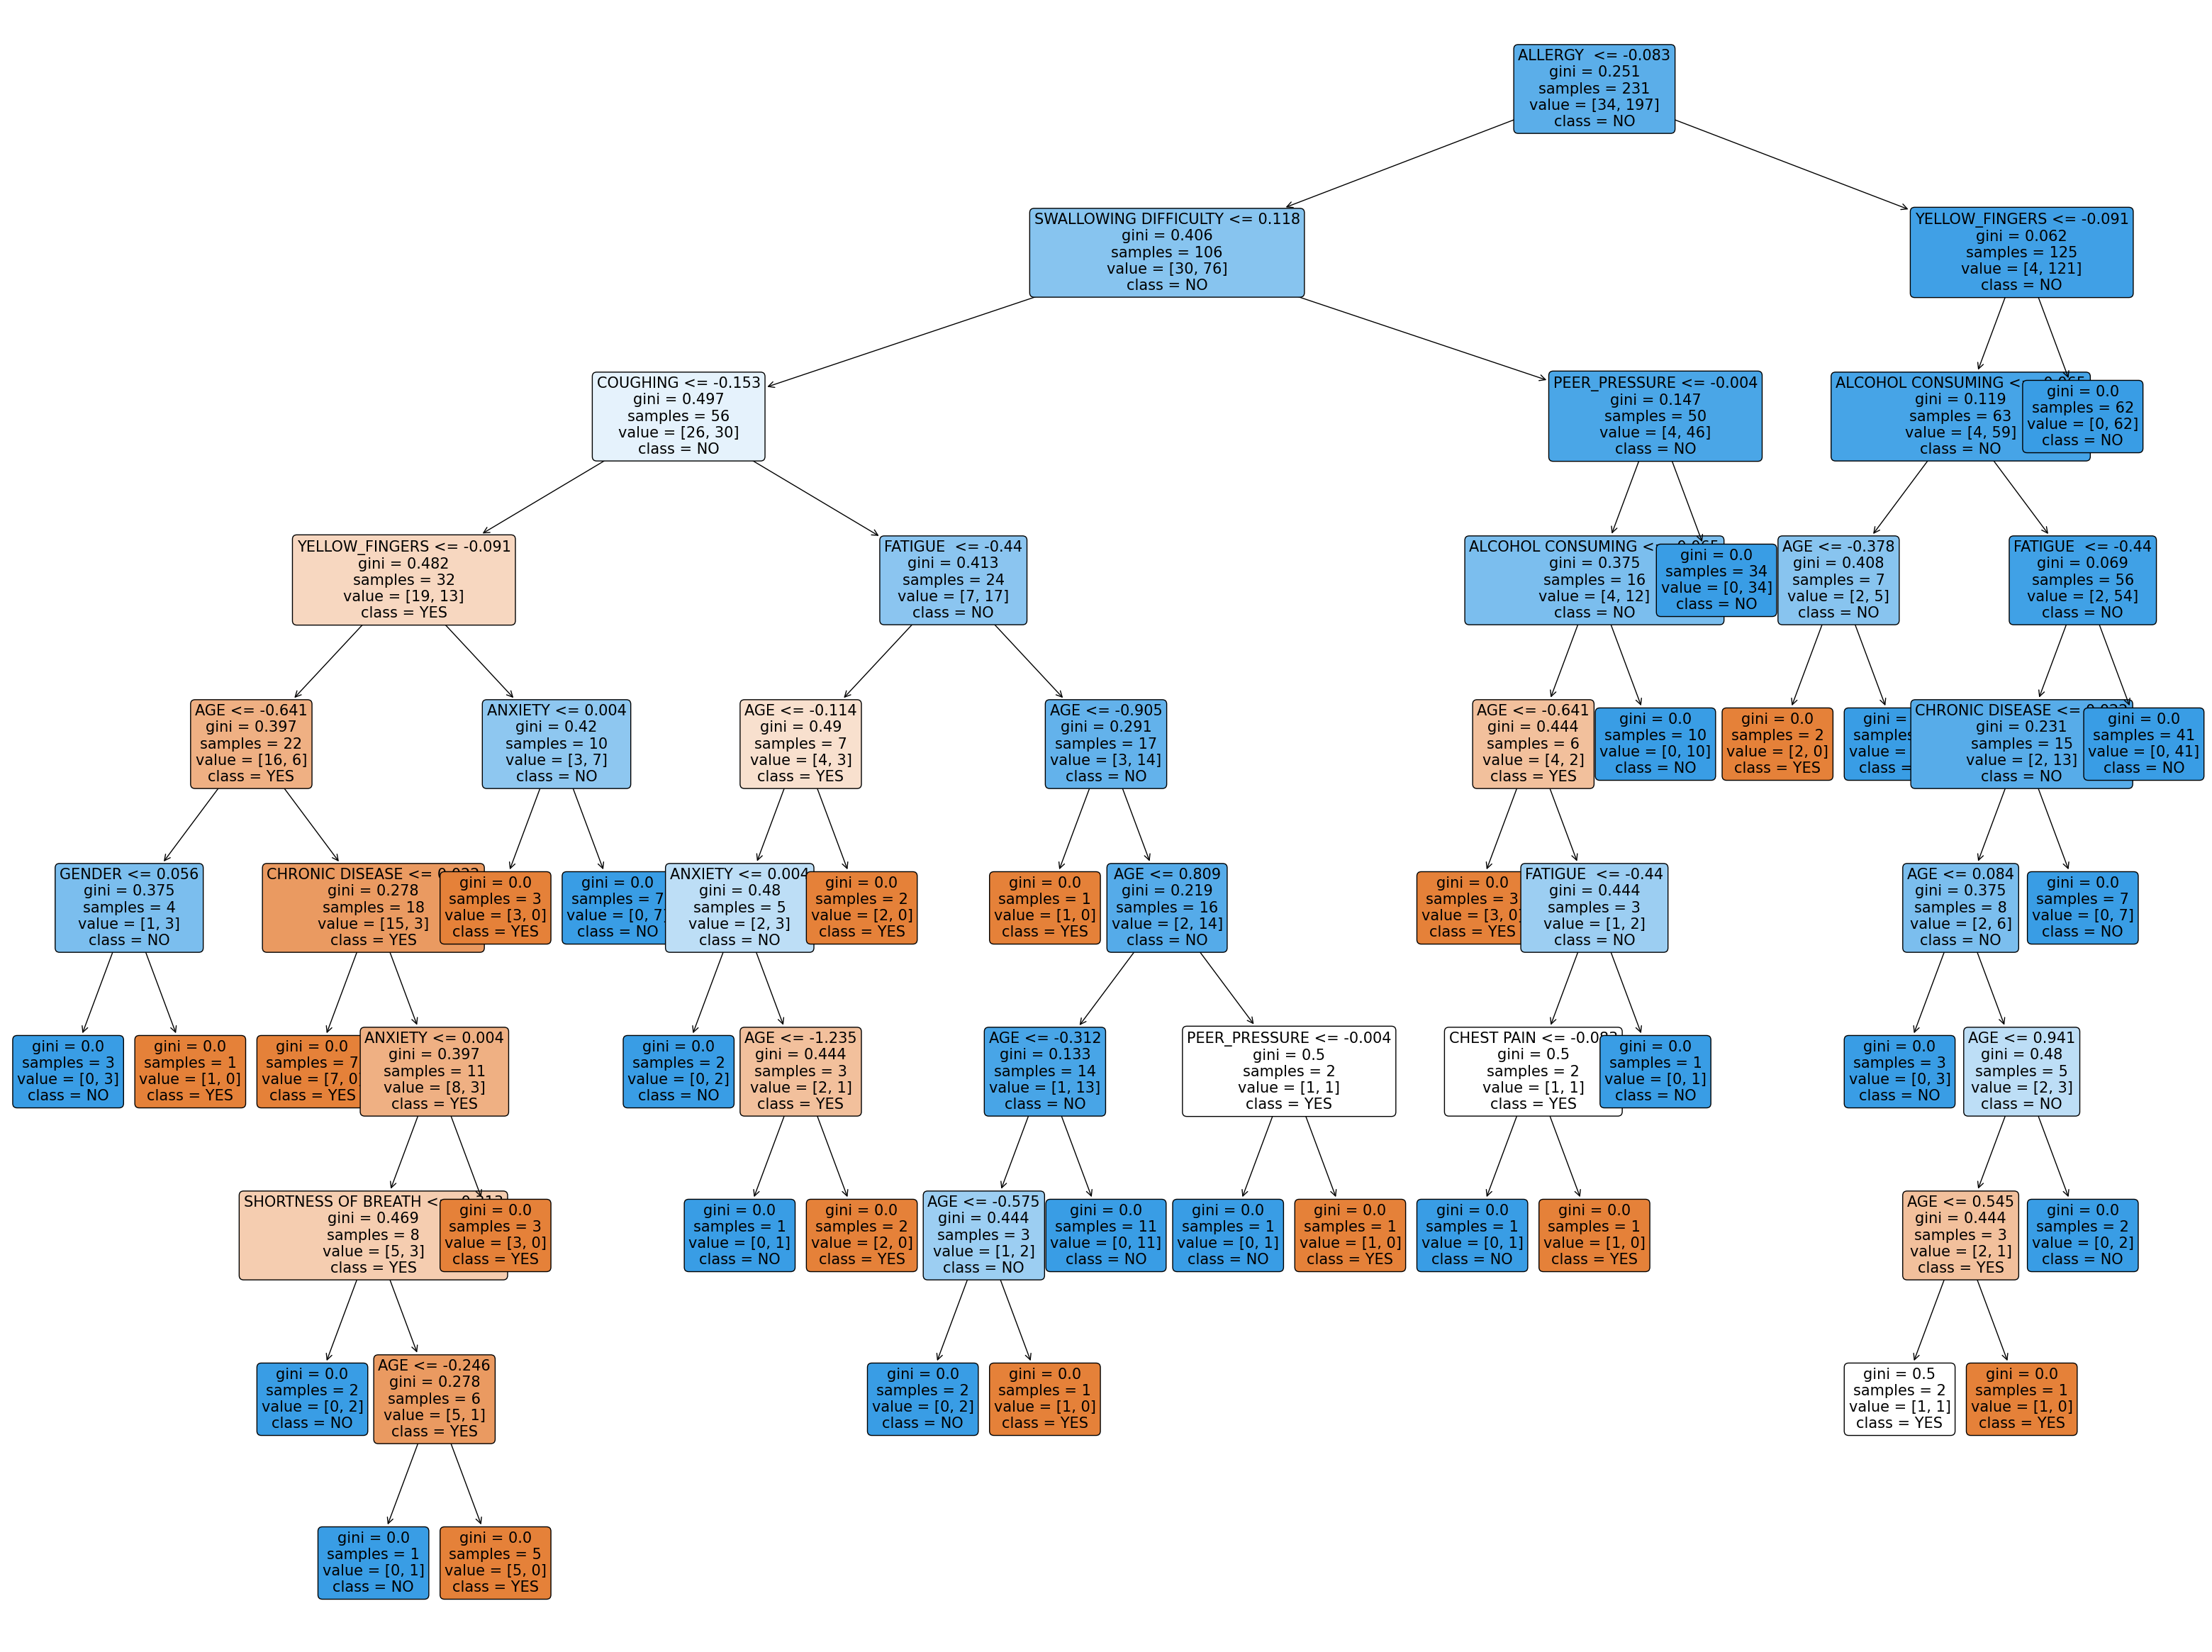

In [148]:
#Declaring features and classes we want to take into consideration for the Decision Tree
features = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN']
classes = ["YES", "NO"]

#Plot the decision tree itself
matplib.figure(figsize=(40,30))
tree.plot_tree(DTC, feature_names=features, class_names=classes, filled=True, rounded=True, fontsize=15)
matplib.show()
#gini value: how much better each classification can be split